Shark Tank INdia Data Analysis


In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
shark_tank=pd.read_csv("/content/Shark Tank US dataset.csv")

In [7]:
shark_tank.head()

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,...,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Guest Present
0,1,AvaTheElephant,1,1,9-Aug-09,5-Feb-10,9-Aug-09,Health/Wellness,Ava The Elephant - Baby and Child Care,http://www.avatheelephant.com/,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
1,1,MrTod'sPieFactory,1,2,9-Aug-09,5-Feb-10,9-Aug-09,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,http://whybake.com/,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
2,1,Wispots,1,3,9-Aug-09,5-Feb-10,9-Aug-09,Business Services,Wispots - Consumer Services,http://www.wispots.com/,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
3,1,CollegeFoxesPackingBoxes,1,4,9-Aug-09,5-Feb-10,9-Aug-09,Lifestyle/Home,College Foxes Packing Boxes - Consumer Services,http://collegehunkshaulingjunk.com/,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
4,1,IonicEar,1,5,9-Aug-09,5-Feb-10,9-Aug-09,Technology/Software,Ionic Ear - Novelties,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN


In [8]:
shark_tank.shape

(1425, 53)

In [9]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       1425 non-null   int64  
 1   Startup Name                        1425 non-null   object 
 2   Episode Number                      1425 non-null   int64  
 3   Pitch Number                        1425 non-null   int64  
 4   Season Start                        1425 non-null   object 
 5   Season End                          1361 non-null   object 
 6   Original Air Date                   1425 non-null   object 
 7   Industry                            1424 non-null   object 
 8   Business Description                1421 non-null   object 
 9   Company Website                     666 non-null    object 
 10  Pitchers Gender                     1418 non-null   object 
 11  Pitchers Average Age                489 non

In [10]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())
shark_tank['Pitch Number'] = shark_tank['Pitch Number'].astype(pd.Int32Dtype())

shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)
shark_tank['Industry'] = shark_tank['Industry'].astype(str)
shark_tank['Business Description'] = shark_tank['Business Description'].astype(str)

shark_tank['Multiple Entrepreneurs'] = shark_tank['Multiple Entrepreneurs'].astype(pd.Int32Dtype())
shark_tank['Got Deal'] = shark_tank['Got Deal'].astype(pd.Int32Dtype())

the above code is done to make sure integer tupe columns can safely store nan values using pd.Int32Dtyoe()
and also ensures that the textual columns are actually strings

there are null values

In [11]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       1425 non-null   Int32  
 1   Startup Name                        1425 non-null   object 
 2   Episode Number                      1425 non-null   Int32  
 3   Pitch Number                        1425 non-null   Int32  
 4   Season Start                        1425 non-null   object 
 5   Season End                          1361 non-null   object 
 6   Original Air Date                   1425 non-null   object 
 7   Industry                            1425 non-null   object 
 8   Business Description                1425 non-null   object 
 9   Company Website                     666 non-null    object 
 10  Pitchers Gender                     1418 non-null   object 
 11  Pitchers Average Age                489 non

In [12]:
shark_tank.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Season Number,1425.0,8.715088,4.214602,1.0,5.0,9.0,12.0,16.0
Episode Number,1425.0,12.279298,7.356628,1.0,6.0,12.0,18.0,29.0
Pitch Number,1425.0,713.0,411.506379,1.0,357.0,713.0,1069.0,1425.0
Multiple Entrepreneurs,994.0,0.457746,0.498462,0.0,0.0,0.0,1.0,1.0
US Viewership,1421.0,4.930563,1.536624,2.27,3.62,4.62,6.14,8.64
Original Ask Amount,1421.0,283619.985925,350557.430139,10000.0,100000.0,200000.0,350000.0,5000000.0
Original Offered Equity,1421.0,13.277389,8.469334,1.0,8.0,10.0,20.0,100.0
Valuation Requested,1421.0,3647363.515834,5845335.342327,40000.0,750000.0,1666667.0,4000000.0,100000000.0
Got Deal,1421.0,0.611541,0.487571,0.0,0.0,1.0,1.0,1.0
Total Deal Amount,869.0,291911.583429,345019.950449,10000.0,100000.0,200000.0,350000.0,5000000.0


In [16]:
# lets check on unique valuea
for col in shark_tank.columns:
  print(f'{col} has {shark_tank[col].nunique()} unique values')

Season Number has 16 unique values
Startup Name has 1422 unique values
Episode Number has 29 unique values
Pitch Number has 1425 unique values
Season Start has 16 unique values
Season End has 15 unique values
Original Air Date has 344 unique values
Industry has 17 unique values
Business Description has 1420 unique values
Company Website has 664 unique values
Pitchers Gender has 3 unique values
Pitchers Average Age has 3 unique values
Pitchers City has 267 unique values
Pitchers State has 47 unique values
Entrepreneur Names has 921 unique values
Multiple Entrepreneurs has 2 unique values
US Viewership has 243 unique values
Original Ask Amount has 79 unique values
Original Offered Equity has 47 unique values
Valuation Requested has 178 unique values
Got Deal has 2 unique values
Total Deal Amount has 70 unique values
Total Deal Equity has 64 unique values
Deal Valuation has 211 unique values
Number of Sharks in Deal has 5 unique values
Investment Amount Per Shark has 80 unique values
Equi

In [19]:
# lets fetch some recent info from the data
shark_tank_recent=shark_tank.loc[(shark_tank['Season Number']== 16)]

In [20]:
print(shark_tank['Season Number'].max(),'total seasons in the shark tank')
print(shark_tank['Pitch Number'].max(),'total pitches in the shark tank')
print(shark_tank['Episode Number'].max(),'total episodes in the shark tank')

16 total seasons in the shark tank
1425 total pitches in the shark tank
29 total episodes in the shark tank


Season Number   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
Episode Number  14   9  15  26  29  29  29  24  24  23  24  25  24  22  22  16


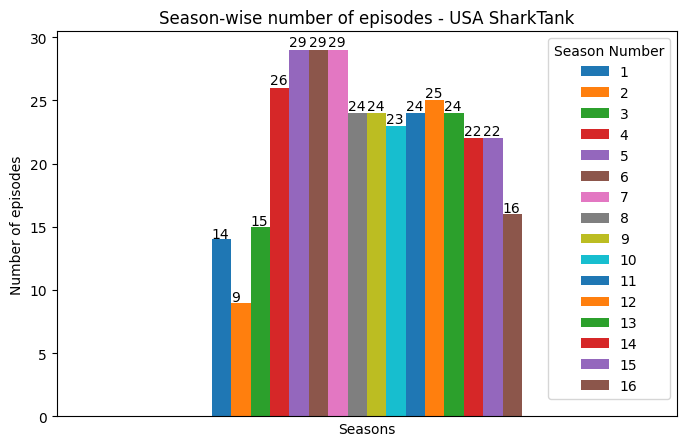

In [21]:
# lets check the no of episodes according to the season
tmp = pd.pivot_table(shark_tank, values='Episode Number', columns='Season Number', aggfunc='max')
print(tmp)
ax = tmp.plot.bar(figsize=(8,5), title="Season-wise number of episodes - USA SharkTank")
plt.xlabel("Seasons")
plt.ylabel("Number of episodes")
plt.xticks([])
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [28]:
# lets look into the season wise pitches
import plotly.express as px
import plotly.io as pio
pio.templates.default='plotly_dark'
pio.renderers.default='notebook'
tmp=shark_tank['Season Number'].value_counts().sort_values()
fig=px.bar(tmp, x=tmp.values, title='<b> Shark Tank Season wise number of pitches USA </b>', template='plotly_white',text=tmp,width=490, height =640)
fig.update_yaxes(tickvals=list(range(17)))
fig.update_xaxes(visible=False)
fig.show(renderer="colab")

In [30]:
# so the no of pitches in each episodes are
print(shark_tank[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[3 4 5]


In [41]:
# types of industries which came in shark tank usa
# Types of industries, came for investments, in all seasons
tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> Shark Tank USA - Industry wise startups (in all seasons)</b>", template='simple_white', text=tmp, width=850, height=700)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="colab")


In [42]:
# teh industries which came in the cureent seasson that is s16 is
tmp = shark_tank_recent['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> US Shark Tank in 16th season - Industry wise startups</b>", template='simple_white', text=tmp, width=620, height=650)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="colab")


In [46]:
# lets cjeckk the average of the finances in all the seasons
pivot = pd.pivot_table(shark_tank, values=['Original Ask Amount','Total Deal Amount','Valuation Requested','Deal Valuation','Original Offered Equity','Total Deal Equity'], columns='Season Number', aggfunc=np.mean, sort=False)
pivot.style.format('{:.0f}')

## note that the amount is in dollars and equiry in percent

Season Number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Original Ask Amount,235766,161667,239033,247078,256750,324957,310129,309740,286083,320924,287812,288120,334823,258954,274138,286383
Total Deal Amount,181111,209474,173393,182577,271875,397652,317374,333559,289215,343651,305476,307549,333438,277661,259237,264178
Valuation Requested,1649936,1113750,1645594,1646695,2448201,3244817,3545548,4125604,4152836,4026374,4047353,4922902,6786688,3910736,4410934,4594895
Deal Valuation,376093,531892,568208,716328,1468280,2239535,2792556,2321307,2786878,2314086,2581500,2855306,3130918,2307701,2218556,2176679
Original Offered Equity,22,19,21,18,16,14,14,12,12,11,12,10,10,10,9,9
Total Deal Equity,50,38,41,30,27,24,22,21,21,23,20,21,19,19,18,17


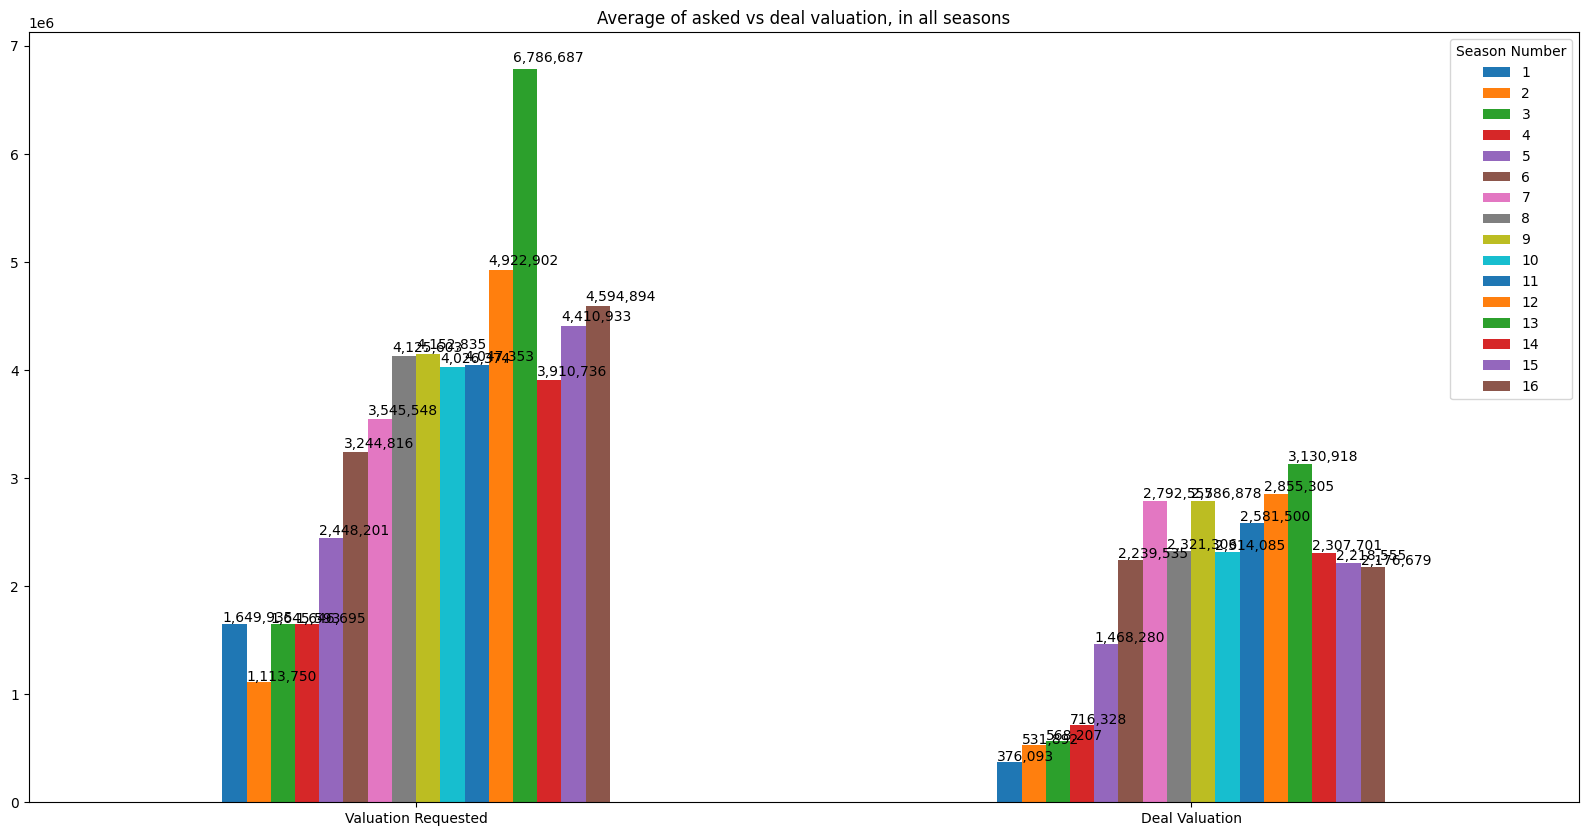

In [47]:
# avg of offered valuation or deals in all the season
ax = pd.pivot_table(shark_tank, values=['Valuation Requested','Deal Valuation'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(20,10), title="Average of asked vs deal valuation, in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

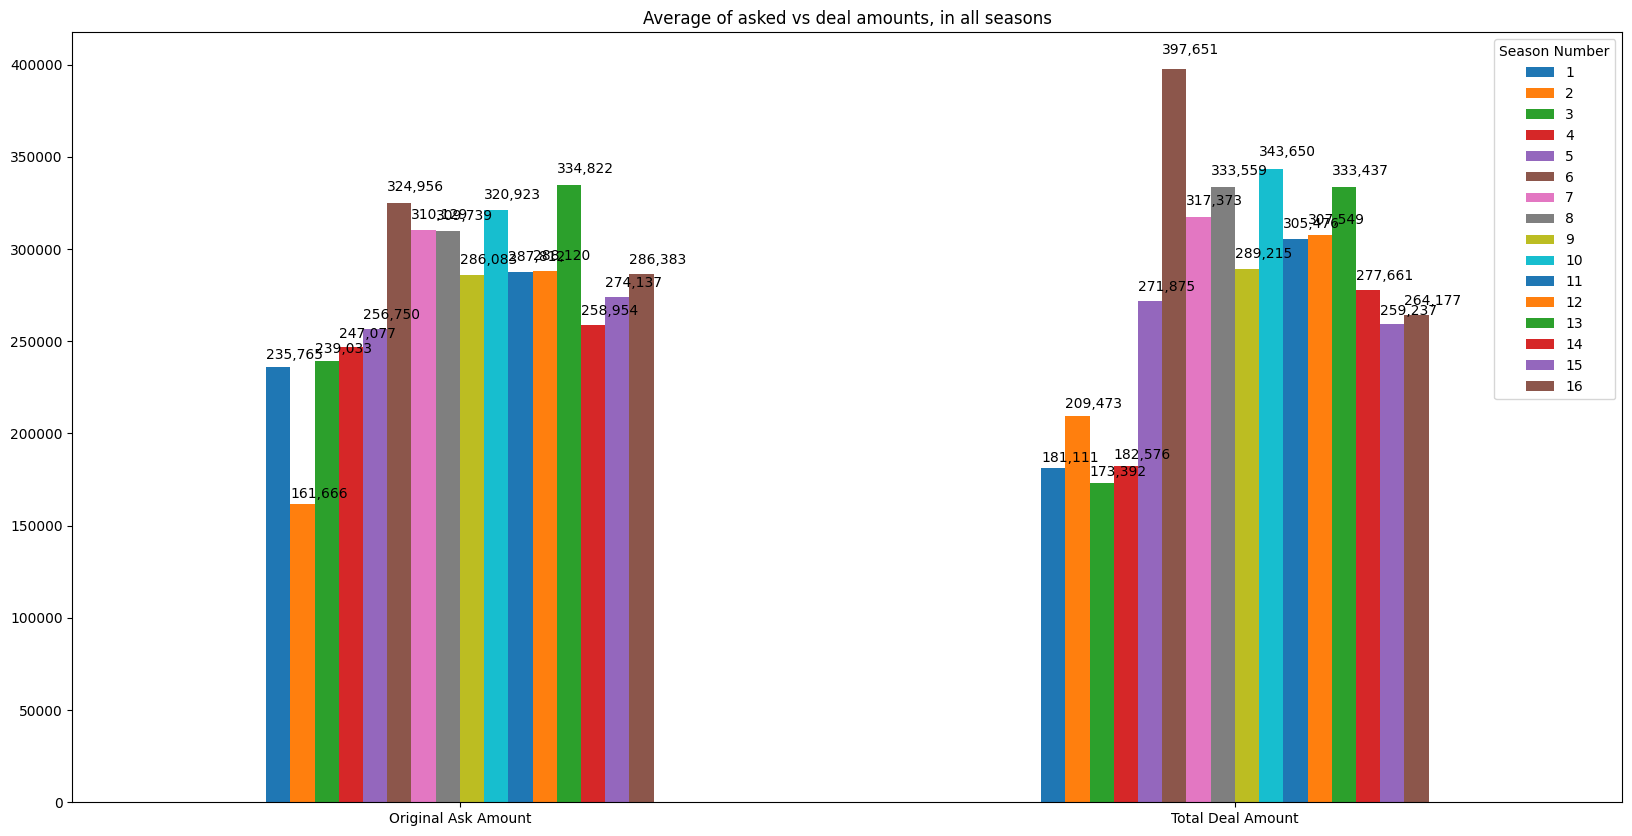

In [48]:
# the avg of offered deal amounts
ax = pd.pivot_table(shark_tank, values=['Original Ask Amount','Total Deal Amount'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(20,10), title="Average of asked vs deal amounts, in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02))

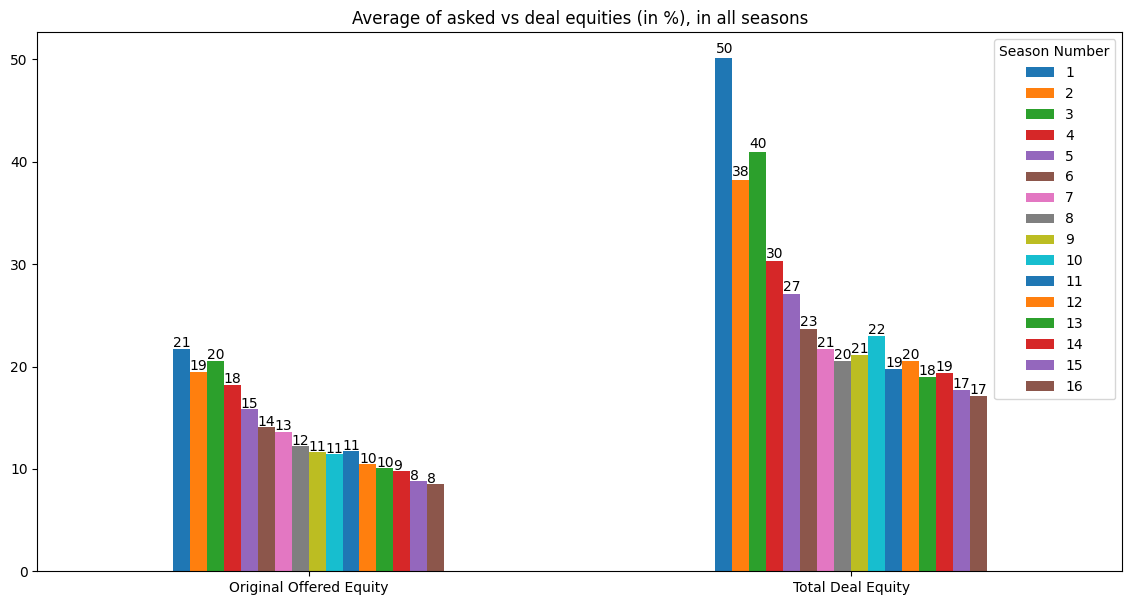

In [49]:
# All seasons average of offered/deal equities
ax = pd.pivot_table(shark_tank, values=['Original Offered Equity','Total Deal Equity'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(14,7), title="Average of asked vs deal equities (in %), in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

Pitchers Gender
Male          769
Female        379
Mixed Team    270
Name: count, dtype: int64 

Pitchers Gender
Male          54%
Female        27%
Mixed Team    19%
Name: proportion, dtype: object 



Text(0, 0.5, '')

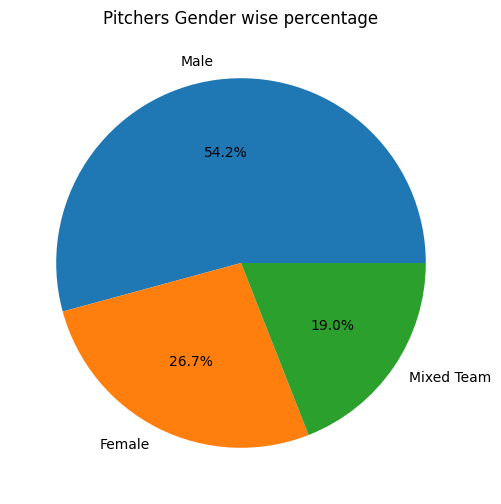

In [51]:
# gender wise pitchers
#counts
print(shark_tank['Pitchers Gender'].value_counts(),'\n')

# in perceent
print(round(shark_tank['Pitchers Gender'].value_counts(normalize=True)*100).astype(str).str.replace('.0','%',regex=False),"\n")

plt.title("Pitchers Gender wise percentage")
shark_tank['Pitchers Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(6,6))
plt.ylabel("")

Pitchers Average Age
Middle    439
Young      37
Old        13
Name: count, dtype: int64 

Pitchers Average Age
Middle    90%
Young      8%
Old        3%
Name: proportion, dtype: object 



Text(0, 0.5, '')

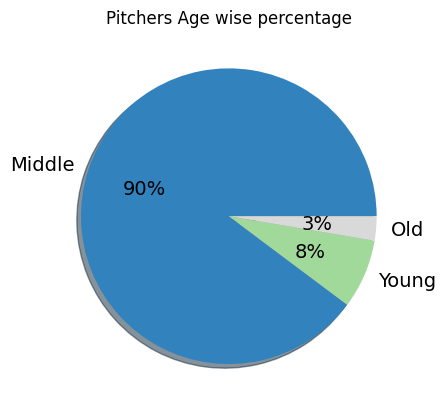

In [52]:
# lets check the pitchers according to their age
print(shark_tank['Pitchers Average Age'].value_counts(),"\n")

# in perncent
print(round(shark_tank['Pitchers Average Age'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")
plt.title("Pitchers Age wise percentage")
shark_tank["Pitchers Average Age"].value_counts().plot(kind='pie', autopct='%.0f%%', cmap='tab20c', shadow=True, fontsize=14)
plt.ylabel('')

Got Deal
1    869
0    552
Name: count, dtype: Int64 

Got Deal
1    61%
0    39%
Name: proportion, dtype: object


Text(0, 0.5, '')

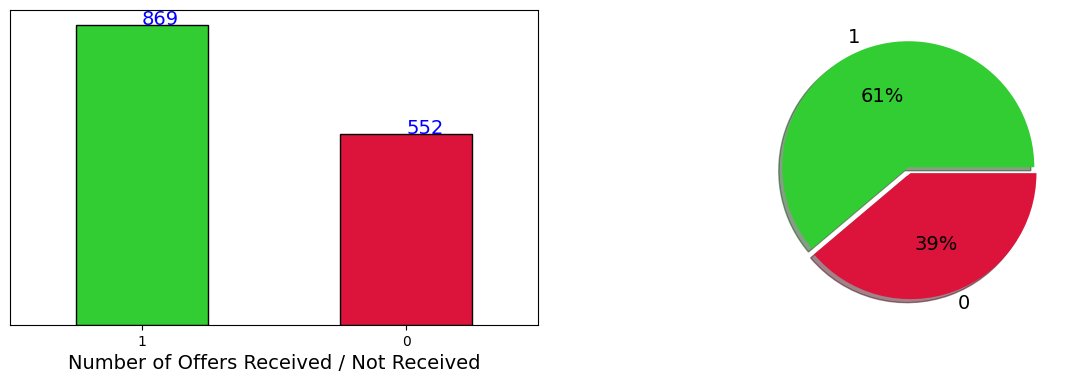

In [53]:
# Offers received


print(shark_tank['Got Deal'].value_counts(), "\n")
print(round(shark_tank['Got Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Got Deal"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Number of Offers Received / Not Received", size=14)
plt.yticks([])
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Got Deal"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="blue")

ax2 = plt.subplot(222)
shark_tank["Got Deal"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=14)
plt.ylabel('')

From the above graphs and data we see that the total deals recieved were 869 that is 61% of them got the deal

Pitchers Gender
Male          444
Female        240
Mixed Team    180
Name: count, dtype: int64


Text(0, 0.5, '')

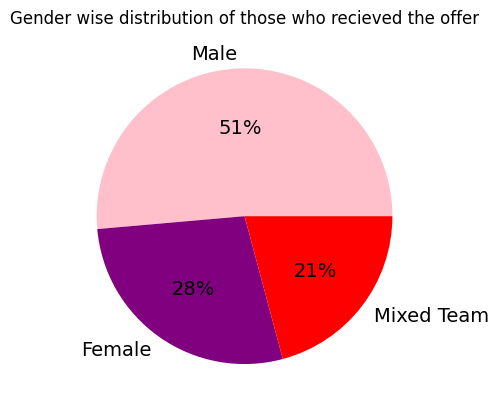

In [56]:
# offer recieved according to the gender distribution
print(shark_tank[shark_tank['Got Deal']==1]['Pitchers Gender'].value_counts())
plt.title("Gender wise distribution of those who recieved the offer")
shark_tank[shark_tank['Got Deal']==1]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%',colors=["pink", "purple", "red"], fontsize=14)
plt.ylabel('')

Pitchers Gender
Male          323
Female        137
Mixed Team     90
Name: count, dtype: int64


Text(0, 0.5, '')

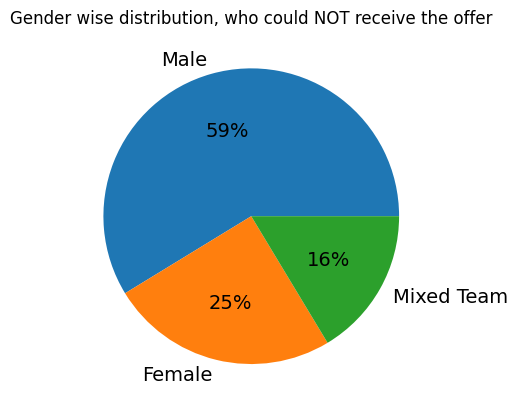

In [57]:
# the distribution of those who couldn't recieve the offer according to gender
print(shark_tank[shark_tank['Got Deal']==0]['Pitchers Gender'].value_counts())
plt.title("Gender wise distribution, who could NOT receive the offer")
shark_tank[shark_tank['Got Deal']==0]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%', fontsize=14)
plt.ylabel('')

In [59]:
# Maximum amount requested
from babel.numbers import format_currency

print("Maximum amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].max(), 'USD', locale='en_US').replace(".00", ""))

Maximum amount requested, by a pitcher - $5,000,000


In [60]:
# the least amount requested
print("Least amount requested by a pitcher - ", format_currency(shark_tank['Original Ask Amount'].min(), 'USD', locale='en_US').replace(".00", ""))

Least amount requested by a pitcher -  $10,000


In [61]:
# Sum of investment asked
print("Sum of investment amount asked, by all startup companies, in US Shark Tank -", format_currency(shark_tank['Original Ask Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in US Shark Tank - $403,024,000


In [62]:
# Amount invested by all sharks, in US SharkTank
print("Amount invested by all sharks, in Shark Tank US -", format_currency(shark_tank['Total Deal Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Amount invested by all sharks, in Shark Tank US - $253,671,166


In [63]:
# Sum of loan/debt amount, in American Shark Tank
print("Sum of loan/debt amount, given by all sharks, in American SharkTank -", format_currency(shark_tank['Loan'].sum(), 'USD', locale='en_US').replace(".00", ""))

Sum of loan/debt amount, given by all sharks, in American SharkTank - $24,712,500


In [65]:
# Top 15 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

shark_tank['Total Deal Amount in Millions'] = shark_tank['Total Deal Amount']/1000000
tmpdf = shark_tank.sort_values('Total Deal Amount in Millions', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount in Millions', color="Startup Name", title="Highest investment as per deal amount (in millions)", text=tmpdf['Total Deal Amount in Millions'].map(float).map(str))
fig.show(renderer="colab")

Startup Name
AirCar                     5000000.0
MokiDoorstep               3000000.0
SynDaverLabs               3000000.0
Zipz                       2500000.0
DBestProducts              2350000.0
Fizzics                    2000000.0
TenThirtyOneProductions    2000000.0
Vengo                      2000000.0
RuggedManiac               1750000.0
BeyondSushi                1500000.0
RoboBurger                 1500000.0
Sworkit                    1500000.0
XCraft                     1500000.0
Trunkster                  1400000.0
HyConn                     1250000.0
Name: Total Deal Amount, dtype: float64


In [67]:
# Top 20 investments, as per total equity/shares percentage diluted
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest investment as per equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="colab")



Startup Name
ClassroomJams           100.0
CoolWraps               100.0
Evrewares               100.0
Hugo'sAmazingTape       100.0
HyConn                  100.0
MokiDoorstep            100.0
RokBlok                 100.0
TurboBaster             100.0
WineBalloon             100.0
LegacyShave              95.0
GrooveBook               80.0
RemyxxReKixxSneakers     80.0
Henry'sHumdingers        75.0
JeskaShoeCompany         70.0
Lightfilm                70.0
TheUROClub               70.0
ReaderestSpecsecure      65.0
TheLastLid               60.0
TreasureChestPets        60.0
CordaRoy's               58.0
Name: Total Deal Equity, dtype: float64


total 9 startups their wntire company(equity) to the sharks

In [68]:
# Startups who sold (exactly) 1/3rd of their company (equity) to Sharks
print(shark_tank.loc[shark_tank['Total Deal Equity'] == 33.3][["Startup Name"]].count())
print(shark_tank.loc[shark_tank['Total Deal Equity'] == 33.3][["Season Number","Startup Name", "Total Deal Equity"]])

tmpdf = shark_tank.loc[shark_tank['Total Deal Equity'] == 33.3]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="colab")

Startup Name    25
dtype: int64
      Season Number                 Startup Name  Total Deal Equity
551               7                       Shefit               33.3
584               7                        Trobo               33.3
591               7                  TheDripDrop               33.3
604               7  EVPExtremeVehicleProtection               33.3
626               8             AngelsandTomboys               33.3
633               8                  Sunscreeenr               33.3
667               8                       Kooler               33.3
695               8                      Goverre               33.3
697               8            BootyQueenApparel               33.3
702               8                PeoplesDesign               33.3
726               9                  HumanBobber               33.3
768               9              GoatPetProducts               33.3
829              10                     OatMeals               33.3
865             

In [70]:
# Startups who sold more than 1/3rd of their company (equity) to Sharks
print(shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ][["Startup Name"]].count())
print(shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ][["Season Number","Startup Name","Total Deal Amount", "Total Deal Equity"]])

tmpdf = shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ].sort_values('Total Deal Equity', ascending=False)
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold more than 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="colab")

Startup Name    181
dtype: int64
      Season Number       Startup Name  Total Deal Amount  Total Deal Equity
0                 1     AvaTheElephant            50000.0               55.0
1                 1  MrTod'sPieFactory           460000.0               50.0
5                 1       APerfectPear           500000.0               50.0
6                 1      ClassroomJams           250000.0              100.0
10                1        TurboBaster            35000.0              100.0
...             ...                ...                ...                ...
1319             15     MamaSingMySong           150000.0               33.3
1321             15    MeattheMushroom           150000.0               33.3
1322             15             AuBaby            80000.0               35.0
1355             15                 K3           100000.0               40.0
1399             16            Tabeeze           100000.0               33.3

[181 rows x 4 columns]


In [72]:
# Startups who got Debt/loan amount
print("Number of startups who got debt/loan amount", shark_tank['Loan'].count(),"\n")

shark_tank.loc[shark_tank['Loan'] >= 1][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity","Loan"]]

Number of startups who got debt/loan amount 58 



,Season Number,Startup Name,Total Deal Amount,Total Deal Equity,Loan
272,5,RapidRamenCooker,150000.0,15.00,150000.0
289,5,BetterLife,400000.0,17.00,400000.0
291,5,PaparazziProposals,250000.0,33.00,200000.0
299,5,Grace&Lace,87500.0,10.00,87500.0
300,5,Yubo,150000.0,20.00,150000.0
433,6,Scratch&GrainBakingCo,150000.0,20.00,150000.0
459,6,CocoJack,125000.0,25.00,125000.0
571,7,BetterBack,750000.0,8.00,750000.0
580,7,Vengo,2000000.0,10.00,2000000.0
586,7,Coolbox,500000.0,15.00,500000.0


In [73]:
# Top 20 investments, as per total debt/loan amount
print(shark_tank.groupby('Startup Name')['Loan'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Loan', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Loan', color="Startup Name", title="Highest Investment as per Debt amount", text=tmpdf['Loan'])
fig.show(renderer="colab")

Startup Name
DBestProducts    2000000.0
Vengo            2000000.0
RoboBurger       1500000.0
Plunge           1200000.0
BoostOxygen      1000000.0
EverlyWell       1000000.0
Goumi            1000000.0
NuMilk           1000000.0
BetterBack        750000.0
GunnarOptiks      750000.0
Inboard           750000.0
Outer             750000.0
Collars&Co        700000.0
Ade+Ayo           500000.0
Bleni             500000.0
Coolbox           500000.0
StyleClub         500000.0
TekDry            500000.0
TiaLupita         500000.0
WaiveCar          500000.0
Name: Loan, dtype: float64


In [74]:
# Startups who gave Royalty
print("Number of startups who gave Royalty", shark_tank['Royalty Deal'].count(),"\n")

shark_tank.loc[shark_tank['Royalty Deal'] == "yes"][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

Number of startups who gave Royalty 85 



,Season Number,Startup Name,Total Deal Amount,Total Deal Equity
6,1,ClassroomJams,250000.0,100.0
10,1,TurboBaster,35000.0,100.0
26,1,ElementBars,150000.0,30.0
69,2,FirstDefenseNasalScreen,750000.0,30.0
72,2,ModMomFurniture,90000.0,33.0
...,...,...,...,...
1372,16,Yardsale,250000.0,10.0
1378,16,Chalkless,400000.0,4.0
1382,16,Taverns,400000.0,15.0
1394,16,Legit Kits,150000.0,5.0


Season Number  1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
Royalty Deal    3   3   1   4   2   3   6   5   5   4  10   6  11  12   5   5


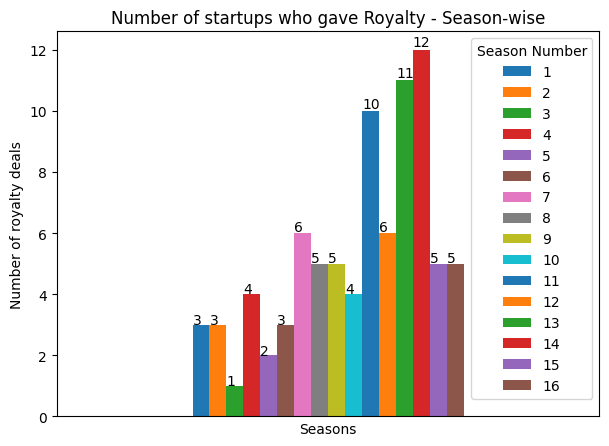

In [75]:
# Season-wise number of royalty deals
tmp = pd.pivot_table(shark_tank, values='Royalty Deal', columns='Season Number', aggfunc='count')
print(tmp)
ax = tmp.plot.bar(figsize=(7,5), title="Number of startups who gave Royalty - Season-wise")
plt.xlabel("Seasons")
plt.ylabel("Number of royalty deals")
plt.xticks([])
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [76]:
# Startups who gave Advisory shares
print("Number of startups who gave Advisory shares/equity", shark_tank['Advisory Shares Equity'].count(),"\n")

shark_tank.loc[shark_tank['Advisory Shares Equity'] > 0][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity", "Advisory Shares Equity"]]

Number of startups who gave Advisory shares/equity 3 



,Season Number,Startup Name,Total Deal Amount,Total Deal Equity,Advisory Shares Equity
1326,15,Flora,300000.0,15.0,5.0
1348,15,Richaulist,150000.0,15.0,5.0
1358,15,mosh,500000.0,3.5,1.5


In [77]:
# Deals with conditions
print("Number of startups who accepted conditional deals", shark_tank['Deal Has Conditions'].count(),"\n")

shark_tank.loc[shark_tank['Deal Has Conditions'] == 'yes'][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

Number of startups who accepted conditional deals 3 



,Season Number,Startup Name,Total Deal Amount,Total Deal Equity
1334,15,FilaManila,250000.0,20.0
1352,15,Blinger,200000.0,25.0
1378,16,Chalkless,400000.0,4.0


In [79]:
# Gender/age wise pitchers combination
shark_tank.groupby([shark_tank['Pitchers Gender'], shark_tank['Pitchers Average Age'], shark_tank['Multiple Entrepreneurs']]).size().nlargest(10)



Pitchers Gender  Pitchers Average Age  Multiple Entrepreneurs
Mixed Team       Middle                1                         110
Female           Middle                0                         101
Male             Middle                0                          98
                                       1                          96
Female           Middle                1                          29
                 Young                 0                          11
Male             Young                 0                           8
                                       1                           8
Mixed Team       Old                   1                           6
                 Young                 1                           5
dtype: int64

INVESTMENT BY SHARKS

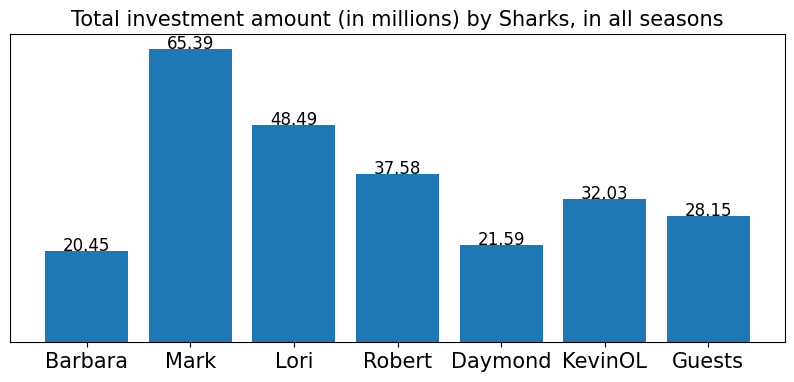

In [80]:
# Amount Invested by sharks, in all seasons
Amount = [(shark_tank['Barbara Corcoran Investment Amount']/1000000).sum(), (shark_tank['Mark Cuban Investment Amount']/1000000).sum(), (shark_tank['Lori Greiner Investment Amount']/1000000).sum(), (shark_tank['Robert Herjavec Investment Amount']/1000000).sum(),
    (shark_tank['Daymond John Investment Amount']/1000000).sum(), (shark_tank['Kevin O Leary Investment Amount']/1000000).sum(), (shark_tank['Guest Investment Amount']/1000000).sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total investment amount (in millions) by Sharks, in all seasons", fontsize=15)
plt.show()

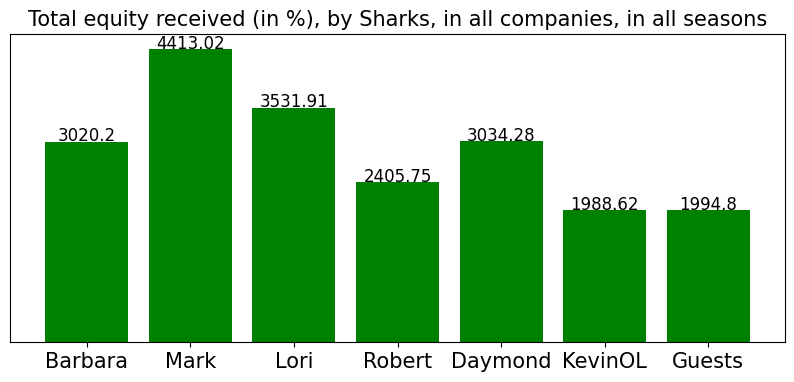

In [81]:
# Equity received by sharks, in all seasons
Equity = [shark_tank['Barbara Corcoran Investment Equity'].sum(), shark_tank['Mark Cuban Investment Equity'].sum(), shark_tank['Lori Greiner Investment Equity'].sum(), shark_tank['Robert Herjavec Investment Equity'].sum(),
    shark_tank['Daymond John Investment Equity'].sum(), shark_tank['Kevin O Leary Investment Equity'].sum(), shark_tank['Guest Investment Equity'].sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'], color='g')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total equity received (in %), by Sharks, in all companies, in all seasons", fontsize=15)
plt.show()

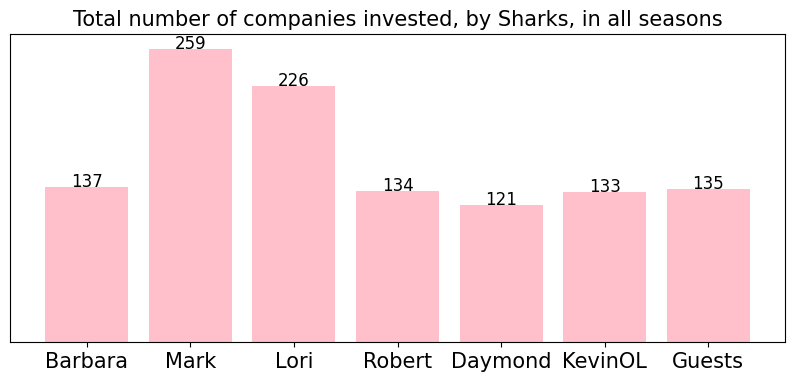

In [82]:
# Number of companies invested, in all seasons
Amount = [(shark_tank['Barbara Corcoran Investment Amount']).count(), (shark_tank['Mark Cuban Investment Amount']).count(), (shark_tank['Lori Greiner Investment Amount']).count(), (shark_tank['Robert Herjavec Investment Amount']).count(),
    (shark_tank['Daymond John Investment Amount']).count(), (shark_tank['Kevin O Leary Investment Amount']).count(), (shark_tank['Guest Investment Amount']).count()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color='pink')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total number of companies invested, by Sharks, in all seasons", fontsize=15)
plt.show()

Barbara's investment

Total investments by Barbara Corcoran 137
Investment amount by Barbara Corcoran $20,448,333.33
Equity received by Barbara Corcoran 3020.2 % in different companies

Company details:
------------------------------------------------------------------------------------------
               Startup Name                Industry  Barbara Corcoran Investment Amount
             AvaTheElephant         Health/Wellness                          50000.0000
          MrTod'sPieFactory       Food and Beverage                         230000.0000
              ClassroomJams      Children/Education                          50000.0000
             StressFreeKids      Children/Education                         250000.0000
                  Coverplay      Children/Education                          35000.0000
                    BodyJac Fitness/Sports/Outdoors                         180000.0000
         PorkBarrelBBQSauce       Food and Beverage                          50000.0000
          TreasureChestP

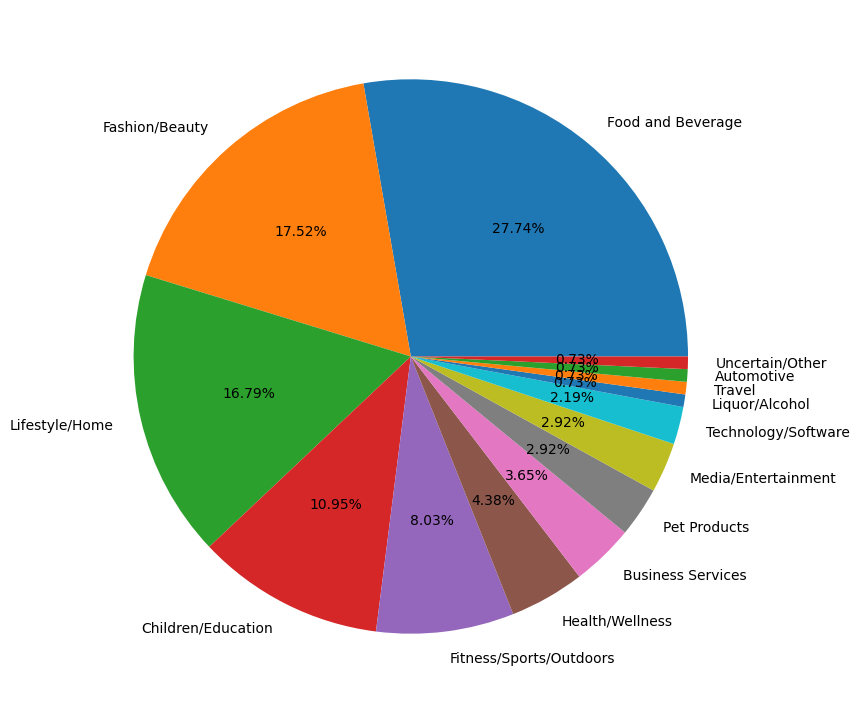

In [83]:
print("Total investments by Barbara Corcoran", shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0][['Barbara Corcoran Investment Amount']].count().to_string()[-3:])
print("Investment amount by Barbara Corcoran", format_currency(shark_tank['Barbara Corcoran Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Barbara Corcoran", round(shark_tank['Barbara Corcoran Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0][["Startup Name","Industry","Barbara Corcoran Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nBarbara Corcoran industry wise investments\n")
print(shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0] [["Startup Name","Barbara Corcoran Investment Amount","Barbara Corcoran Investment Equity"]].sort_values(by="Barbara Corcoran Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Barbara Corcoran Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer='colab')

Mark Cuban's investment

Total investments by Mark Cuban 259
Investment amount by Mark Cuban $65,386,000
Equity received by Mark Cuban 4413.02 % in different companies

Company details:
------------------------------------------------------------------------------------------
             Startup Name                Industry  Mark Cuban Investment Amount
            ClassroomJams      Children/Education                  5.000000e+04
                TippiToes Fitness/Sports/Outdoors                  5.000000e+04
                 Toygaroo      Children/Education                  1.000000e+05
  FirstDefenseNasalScreen         Health/Wellness                  2.500000e+05
                   HyConn         Uncertain/Other                  1.250000e+06
                    EZVIP     Media/Entertainment                  7.500000e+04
           TheCleanBottle       Food and Beverage                  6.000000e+04
    IWantToDrawACatForYou     Technology/Software                  2.500000e+04
              WineBalloon   

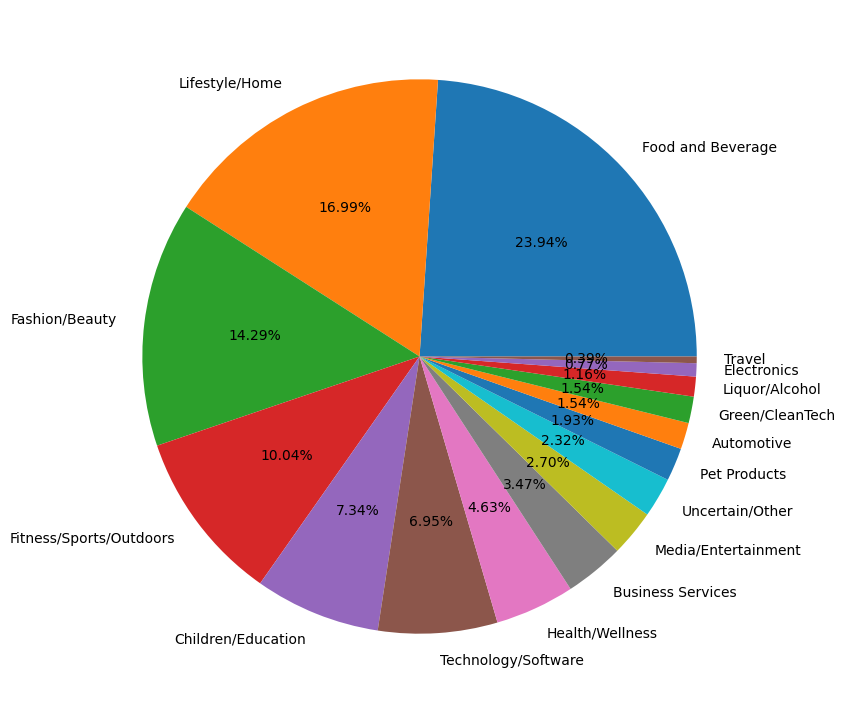

In [85]:
print("Total investments by Mark Cuban", shark_tank[shark_tank['Mark Cuban Investment Amount']>0][['Mark Cuban Investment Amount']].count().to_string()[-3:])
print("Investment amount by Mark Cuban", format_currency(shark_tank['Mark Cuban Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Mark Cuban", round(shark_tank['Mark Cuban Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0][["Startup Name","Industry","Mark Cuban Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nMark Cuban industry wise investments\n")
print(shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()


tmpdf = shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0] [["Startup Name","Mark Cuban Investment Amount","Mark Cuban Investment Equity"]].sort_values(by="Mark Cuban Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Mark Cuban Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="colab")

Lori Greiner's INvestments

Total investments by Lori Greiner 226
Investment amount by Lori Greiner $48,485,500
Equity received by Lori Greiner 3531.91 % in different companies

Company details:
------------------------------------------------------------------------------------------
          Startup Name                Industry  Lori Greiner Investment Amount
                ShowNo          Fashion/Beauty                    7.500000e+04
         M3GirlDesigns          Fashion/Beauty                    1.000000e+05
   ReaderestSpecsecure          Lifestyle/Home                    1.500000e+05
               NailPak          Fashion/Beauty                    5.000000e+04
               BagBowl          Lifestyle/Home                    4.000000e+04
             Back9Dips       Food and Beverage                    7.500000e+04
            MarzSprays         Health/Wellness                    2.000000e+05
            ScrubDaddy          Lifestyle/Home                    2.000000e+05
          TheCoolWazoo      Chi

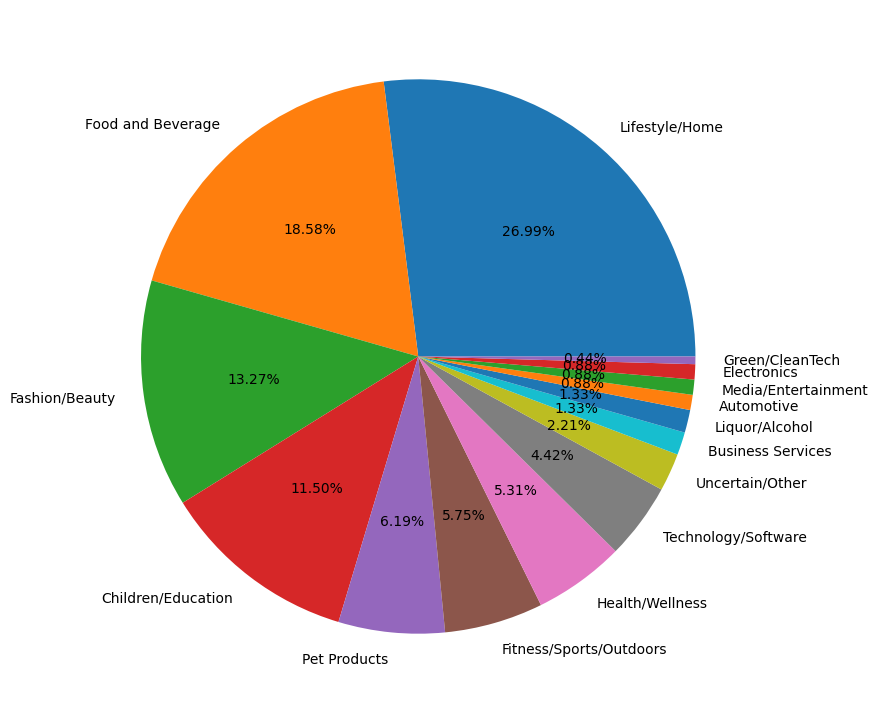

In [86]:
print("Total investments by Lori Greiner", shark_tank[shark_tank['Lori Greiner Investment Amount']>0][['Lori Greiner Investment Amount']].count().to_string()[-3:])
print("Investment amount by Lori Greiner", format_currency(shark_tank['Lori Greiner Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Lori Greiner", round(shark_tank['Lori Greiner Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0][["Startup Name","Industry","Lori Greiner Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nLori Greiner industry wise investments\n")
print(shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0] [["Startup Name","Lori Greiner Investment Amount","Lori Greiner Investment Equity"]].sort_values(by="Lori Greiner Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Lori Greiner Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="colab")

Roberts Investment

Total investments by Robert Herjavec 134
Investment amount by Robert Herjavec $37,580,666
Equity received by Robert Herjavec 2405.75 % in different companies

Company details:
------------------------------------------------------------------------------------------
           Startup Name                Industry  Robert Herjavec Investment Amount
           APerfectPear       Food and Beverage                       2.500000e+05
          ClassroomJams      Children/Education                       5.000000e+04
         GiftCardRescue     Technology/Software                       1.000000e+05
       MyTherapyJournal         Health/Wellness                       4.000000e+04
          Soy-Yer-Dough       Food and Beverage                       1.000000e+05
         GrillCharmsSet          Fashion/Beauty                       5.000000e+04
            JumpForward      Children/Education                       3.000000e+05
      GreaseMonkeyWipes          Lifestyle/Home                      

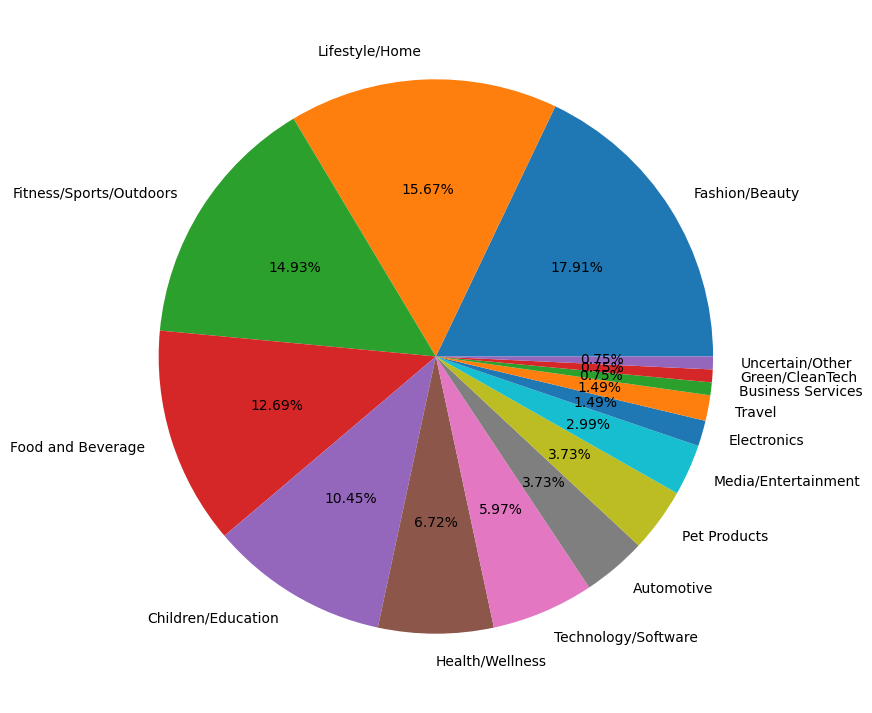

In [88]:
print("Total investments by Robert Herjavec", shark_tank[shark_tank['Robert Herjavec Investment Amount']>0][['Robert Herjavec Investment Amount']].count().to_string()[-3:])
print("Investment amount by Robert Herjavec", format_currency(shark_tank['Robert Herjavec Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Robert Herjavec", round(shark_tank['Robert Herjavec Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0][["Startup Name","Industry","Robert Herjavec Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nRobert Herjavec industry wise investments\n")
print(shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0] [["Startup Name","Robert Herjavec Investment Amount","Robert Herjavec Investment Equity"]].sort_values(by="Robert Herjavec Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Robert Herjavec Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="colab")


Daymond's Investment

Total investments by Daymond John 121
Investment amount by Daymond John $21,590,666.67
Equity received by Daymond John 3034.28 % in different companies

Company details:
------------------------------------------------------------------------------------------
               Startup Name                Industry  Daymond John Investment Amount
          MrTod'sPieFactory       Food and Beverage                     230000.0000
              ClassroomJams      Children/Education                      50000.0000
              Soy-Yer-Dough       Food and Beverage                     100000.0000
          TreasureChestPets            Pet Products                      50000.0000
        GaylaBentleyFashion          Fashion/Beauty                     125000.0000
          HellsBellsHelmets Fitness/Sports/Outdoors                     500000.0000
              LipstickRemix          Fashion/Beauty                      52500.0000
                   Nubrella          Fashion/Beauty                

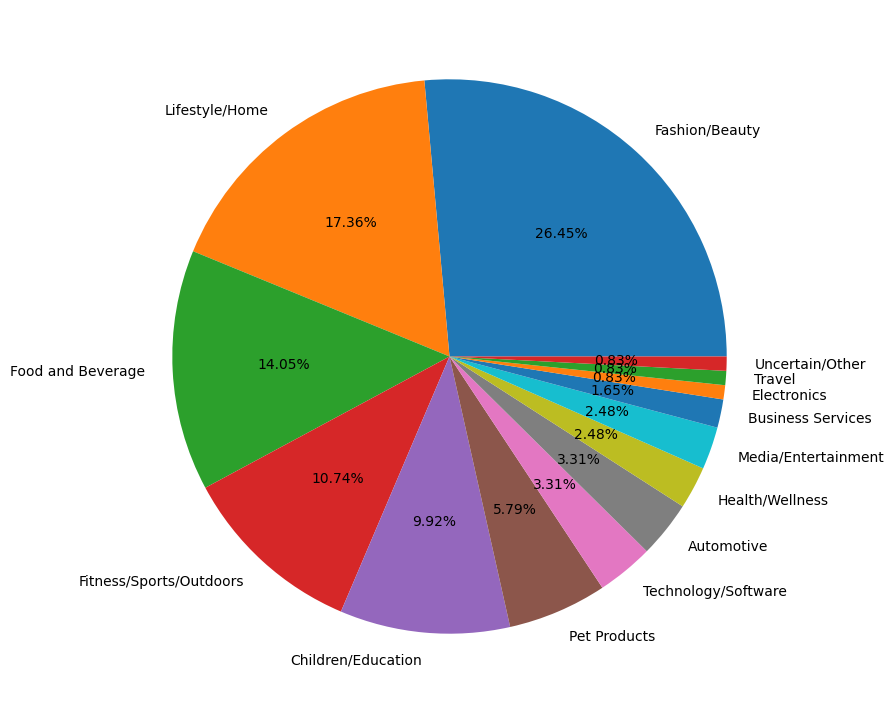

In [89]:
print("Total investments by Daymond John", shark_tank[shark_tank['Daymond John Investment Amount']>0][['Daymond John Investment Amount']].count().to_string()[-3:])
print("Investment amount by Daymond John", format_currency(shark_tank['Daymond John Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Daymond John", round(shark_tank['Daymond John Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Daymond John Investment Amount']>0][["Startup Name","Industry","Daymond John Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nDaymond John industry wise investments\n")
print(shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Daymond John Investment Amount']>0] [["Startup Name","Daymond John Investment Amount","Daymond John Investment Equity"]].sort_values(by="Daymond John Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Daymond John Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="colab")


Kevin's investment

Total investments by Kevin O Leary 133
Investment amount by Kevin O Leary $32,030,833.33
Equity received by Kevin O Leary 1988.62 % in different companies

Company details:
------------------------------------------------------------------------------------------
          Startup Name                Industry  Kevin O Leary Investment Amount
          APerfectPear       Food and Beverage                     2.500000e+05
         ClassroomJams      Children/Education                     5.000000e+04
        GiftCardRescue     Technology/Software                     1.000000e+05
      MyTherapyJournal         Health/Wellness                     4.000000e+04
         Soy-Yer-Dough       Food and Beverage                     1.000000e+05
           JumpForward      Children/Education                     3.000000e+05
              Toygaroo      Children/Education                     1.000000e+05
          FridgeFronts          Lifestyle/Home                     5.000000e+04
           Talbo

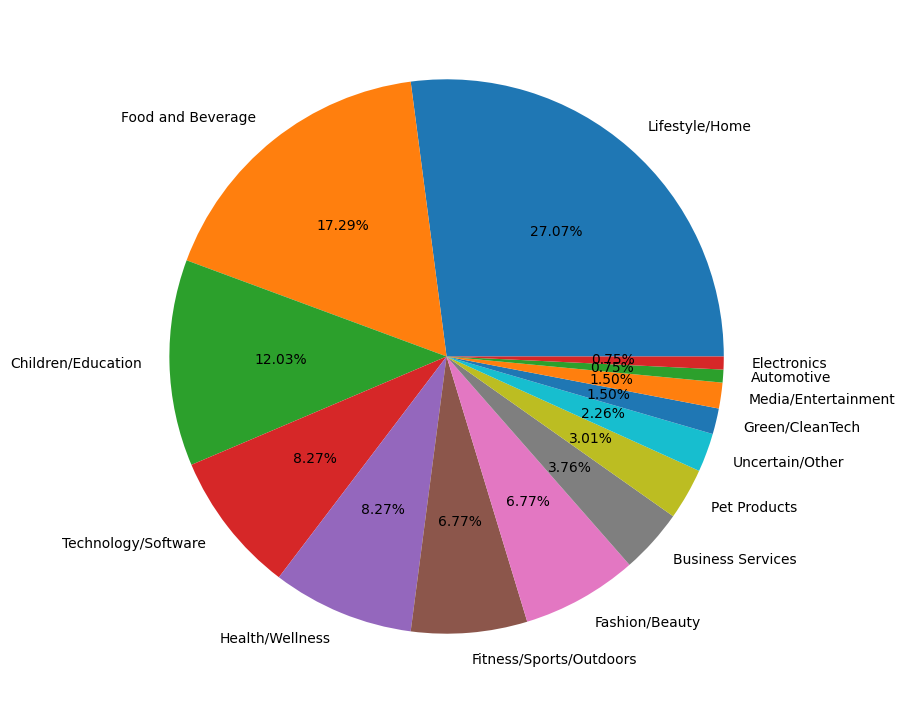

In [91]:
print("Total investments by Kevin O Leary", shark_tank[shark_tank['Kevin O Leary Investment Amount']>0][['Kevin O Leary Investment Amount']].count().to_string()[-3:])
print("Investment amount by Kevin O Leary", format_currency(shark_tank['Kevin O Leary Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Kevin O Leary", round(shark_tank['Kevin O Leary Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0][["Startup Name","Industry","Kevin O Leary Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nKevin O Leary industry wise investments\n")
print(shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0] [["Startup Name","Kevin O Leary Investment Amount","Kevin O Leary Investment Equity"]].sort_values(by="Kevin O Leary Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Kevin O Leary Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="colab")

Total investments by all Guests 35
Investment amount by all Guests $28,149,166.67
Equity received by all Guests 1994.8 % in different companies

Company details:
--------------------------------------------------------------------------------------------
             Startup Name                Industry  Guest Investment Amount        Guest Name
              TurboBaster       Food and Beverage             3.500000e+04  Kevin Harrington
              ElementBars Fitness/Sports/Outdoors             1.500000e+05  Kevin Harrington
               TheUROClub Fitness/Sports/Outdoors             2.500000e+04  Kevin Harrington
           Caffeindicator       Food and Beverage             2.000000e+05  Kevin Harrington
                 Hydromax Fitness/Sports/Outdoors             5.000000e+04    Jeff Foxworthy
                CitiKitty            Pet Products             1.000000e+05  Kevin Harrington
               Tree-T-Pee         Green/CleanTech             1.500000e+05 John Paul DeJoria
 

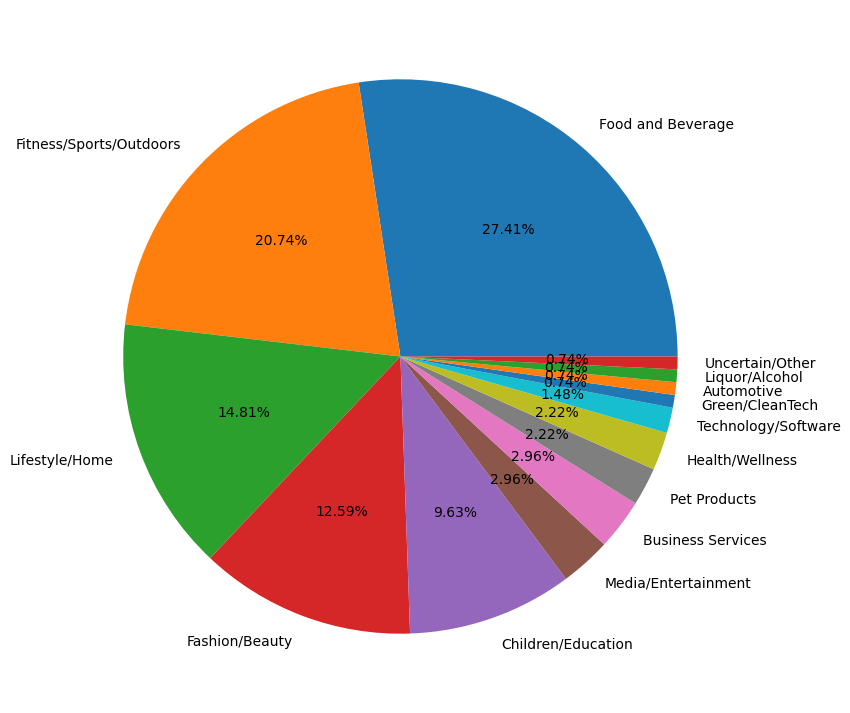

In [93]:
# investment by all the guests
print("Total investments by all Guests", shark_tank[shark_tank['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by all Guests", format_currency(shark_tank['Guest Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by all Guests", round(shark_tank['Guest Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*92)
print(shark_tank.loc[shark_tank['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount","Guest Name"]].to_string(index=False))
print('-'*92)

print("\nAll Guests industry wise investments\n")
print(shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Guest Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="colab")


In [94]:
# Top 10, guest sharks who invested in most number of companies
shark_tank.loc[shark_tank['Guest Investment Amount'] > 1].groupby('Guest Name').size().nlargest(10)

,0
Guest Name,
Daniel Lubetzky,23
Emma Grede,9
Alex Rodriguez,8
Chris Sacca,8
Rohan Oza,8
Kendra Scott,6
Kevin Harrington,5
Matt Higgins,4
Michael Rubin,4


In [95]:
# Investment amount by guests, in Millions
round(shark_tank.groupby(["Guest Name"])["Guest Investment Amount"].sum().sort_values(ascending=False)/1000000,2)

,Guest Investment Amount
Guest Name,
Daniel Lubetzky,5.57
Rohan Oza,3.58
Chris Sacca,1.57
Matt Higgins,1.52
Emma Grede,1.45
Kendra Scott,1.35
Alex Rodriguez,1.24
Michael Rubin,0.98
Tony Xu,0.88


Number of Sharks in Deal
1.0    639
2.0    199
3.0     22
5.0      6
4.0      3
Name: count, dtype: int64 

Number of Sharks in Deal
1.0    74%
2.0    23%
3.0     3%
5.0     1%
4.0     0%
Name: proportion, dtype: object


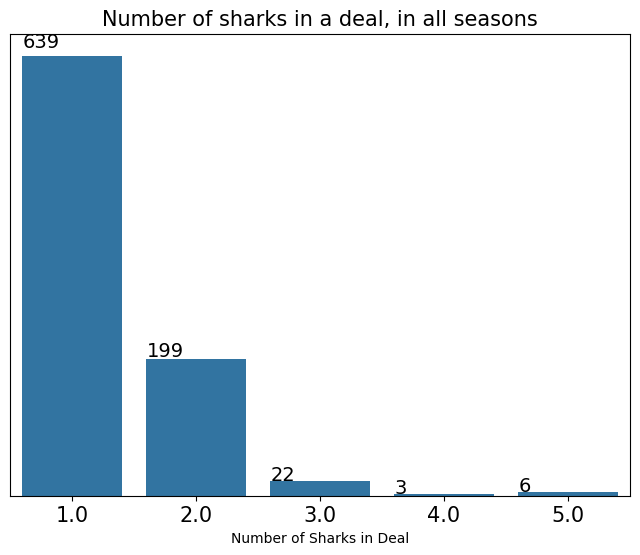

In [96]:
# Number of sharks in a deal, in all seasons
print(shark_tank['Number of Sharks in Deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of Sharks in Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(8, 6))
plt.title("Number of sharks in a deal, in all seasons", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = shark_tank, x = 'Number of Sharks in Deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [97]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of Sharks in Deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

      Season Number   Startup Name  Total Deal Amount  Total Deal Equity
6                 1  ClassroomJams           250000.0              100.0
161               4      BuggyBeds           250000.0               25.0
268               5   Breathometer          1000000.0               30.0
514               7         XCraft          1500000.0               25.0
814              10    CupBoardPro           100000.0               20.0
1272             14        Eyewris           125000.0               20.0


In [98]:
# Sharks with most number of solo deals
amt_cols = shark_tank.columns[shark_tank.columns.str.contains(' Investment Amount')].tolist()
tmp = shark_tank.loc[shark_tank['Number of Sharks in Deal'] == 1][amt_cols]
tmp.count().sort_values(ascending=False).nlargest(3)



,0
Mark Cuban Investment Amount,134
Lori Greiner Investment Amount,112
Barbara Corcoran Investment Amount,91


In [99]:
# Sharks with most number of episode presence, in all seasons
present_cols = shark_tank.columns[shark_tank.columns.str.endswith(' Present')].tolist()
tmp = shark_tank[present_cols]
tmp.sum().sort_values(ascending=False).nlargest(3)


,0
Kevin O Leary Present,1005.0
Mark Cuban Present,956.0
Robert Herjavec Present,844.0


In [100]:
# Top 20 US 🇺🇸 states of pitcher's
tmp = shark_tank['Pitchers State'].value_counts().nlargest(20).sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b>Top 20 States</b> from where pitchers came from", template='simple_white', text=tmp, width=850, height=750)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="colab")

In [101]:
# Top 20 US cities
tmp = shark_tank['Pitchers City'].value_counts().nlargest(20).sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b>Top 20 USA cities</b> with number of startups came for pitching", template='simple_white', text=tmp, width=850, height=800)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="colab")

In [102]:
# Most frequently asked amount, by startups
shark_tank.groupby('Original Ask Amount').size().nlargest(10)

,0
Original Ask Amount,
100000.0,178
200000.0,151
150000.0,150
500000.0,146
250000.0,131
300000.0,110
50000.0,90
400000.0,58
75000.0,57


In [103]:
# Most frequently offered equity, by startups
shark_tank.groupby('Original Offered Equity').size().nlargest(10)

,0
Original Offered Equity,
10.0,469
20.0,229
5.0,220
15.0,162
25.0,73
8.0,33
30.0,33
7.0,19
2.5,17


In [104]:
#frequently invested amount by sharks
shark_tank.groupby('Total Deal Amount').size().nlargest(10)


,0
Total Deal Amount,
100000.0,114
200000.0,99
150000.0,92
250000.0,80
300000.0,79
500000.0,78
50000.0,46
75000.0,36
400000.0,31


# sharks mostly invested more than 100k per deal

# total amount in USD and number of times invested

In [105]:
# most frequently recieved total equity by sharks
shark_tank.groupby('Total Deal Equity').size().nlargest(10)


,0
Total Deal Equity,
20.0,146
25.0,127
10.0,88
15.0,86
30.0,73
40.0,36
50.0,34
5.0,29
33.3,25


In [106]:
# Most frequently asked amount (in USD), deals received percentage and not received percentage, in sucessful deal ✅
tmp2 = pd.crosstab(shark_tank['Original Ask Amount'], shark_tank['Got Deal']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=False)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

,deal_percentage,no_deal_percentage
100000.0,65.0,35.0
150000.0,65.0,35.0
200000.0,64.0,36.0
250000.0,66.0,34.0
500000.0,54.0,46.0
300000.0,65.0,35.0
50000.0,64.0,36.0
75000.0,61.0,39.0
400000.0,59.0,41.0
350000.0,80.0,20.0


In [107]:
# Frequently asked amount (in USD), deals received percentage and not received percentage, in unsucessful deal ❌
tmp2 = pd.crosstab(shark_tank['Original Ask Amount'], shark_tank['Got Deal']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=True)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(15)

,deal_percentage,no_deal_percentage
14000.0,0.0,100.0
48000.0,0.0,100.0
57000.0,0.0,100.0
86000.0,0.0,100.0
140000.0,0.0,100.0
258000.0,0.0,100.0
212000.0,0.0,100.0
155000.0,0.0,100.0
360000.0,0.0,100.0
540000.0,0.0,100.0


In [108]:
# Fequently asked equity, deals received percentage and not received percentage, in unsucessful deal ❌
tmp2 = pd.crosstab(shark_tank['Original Offered Equity'], shark_tank['Got Deal']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=True)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

,deal_percentage,no_deal_percentage
1.50,0.0,100.0
3.10,0.0,100.0
6.50,0.0,100.0
4.50,0.0,100.0
7.60,0.0,100.0
13.50,0.0,100.0
15.87,0.0,100.0
29.00,0.0,100.0
100.00,0.0,100.0
70.00,0.0,100.0


In [110]:
# Mostly successful combinations (of asked amount and offered equity)
shark_tank.loc[shark_tank['Got Deal'] == 1].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)


Original Ask Amount  Original Offered Equity
200000.0             10.0                       46
100000.0             10.0                       43
150000.0             10.0                       42
300000.0             10.0                       36
250000.0             10.0                       30
100000.0             20.0                       27
500000.0             10.0                       22
                     5.0                        21
150000.0             15.0                       20
250000.0             5.0                        20
dtype: int64

In [111]:
# Most frequently asked amount, by startups who could NOT get a deal
shark_tank.loc[shark_tank['Got Deal'] == 0].groupby('Original Ask Amount').size().nlargest(10)

,0
Original Ask Amount,
500000.0,67
100000.0,62
200000.0,54
150000.0,52
250000.0,45
300000.0,39
50000.0,32
400000.0,24
75000.0,22


In [112]:
# Most frequently offered equity, by startups who could NOT get a deal
shark_tank.loc[shark_tank['Got Deal'] == 0].groupby('Original Offered Equity').size().nlargest(10)

,0
Original Offered Equity,
10.0,162
20.0,112
5.0,79
15.0,60
25.0,34
30.0,17
8.0,14
40.0,8
3.0,6


In [113]:
# Mostly rejected combinations (of asked amount and offered equity)
shark_tank.loc[shark_tank['Got Deal'] == 0].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

,,0
Original Ask Amount,Original Offered Equity,
100000.0,10.0,24
500000.0,5.0,24
100000.0,20.0,21
200000.0,10.0,18
250000.0,10.0,17
300000.0,10.0,17
150000.0,10.0,16
200000.0,20.0,14
500000.0,10.0,14


In [114]:
# Many companies got more amount than they asked/expected
print(shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount"]]

Startup Name    136
dtype: int64


,Season Number,Startup Name,Original Ask Amount,Total Deal Amount
15,1,GiftCardRescue,150000.0,200000.0
30,1,Soy-Yer-Dough,125000.0,300000.0
43,1,JumpForward,150000.0,600000.0
64,2,WurkinStiffs,85000.0,100000.0
65,2,TippiToes,30000.0,100000.0
...,...,...,...,...
1349,15,VSEAT,150000.0,200000.0
1354,15,HYPD,125000.0,350000.0
1371,16,Doatnut,100000.0,200000.0
1372,16,Yardsale,200000.0,250000.0


In [115]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Season Number","Startup Name","Original Offered Equity","Total Deal Equity"]]

,Season Number,Startup Name,Original Offered Equity,Total Deal Equity
0,1,AvaTheElephant,15.0,55.0
1,1,MrTod'sPieFactory,10.0,50.0
5,1,APerfectPear,15.0,50.0
6,1,ClassroomJams,10.0,100.0
10,1,TurboBaster,35.0,100.0
...,...,...,...,...
1413,16,Firefly,2.5,5.0
1416,16,DuzterHockey,10.0,20.0
1417,16,HistoryByMail,10.0,20.0
1418,16,CowPots,10.0,20.0


In [116]:
# Below (105) companies got the same valuation they requested (with or without loan)
print(shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    111
dtype: int64


,Season Number,Startup Name,Valuation Requested,Deal Valuation
51,1,GreaseMonkeyWipes,100000.0,100000.0
60,1,Qubits,176471.0,176471.0
78,2,Ride-OnCarry-On,200000.0,200000.0
85,2,DaisyCakes,200000.0,200000.0
92,2,HyConn,1250000.0,1250000.0
...,...,...,...,...
1386,16,SnowScholars,750000.0,750000.0
1394,16,Legit Kits,3000000.0,3000000.0
1400,16,Rinseroo,6860000.0,6860000.0
1409,16,HellaAwkward,2000000.0,2000000.0


In [117]:
# There are 49 companies which got more valuation than they pitched
print(shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    49
dtype: int64


,Season Number,Startup Name,Valuation Requested,Deal Valuation
30,1,Soy-Yer-Dough,500000.0,588235.0
31,1,GrillCharmsSet,200000.0,250000.0
77,2,HillbillyBrand,200000.0,300000.0
84,2,SweepEasy,160000.0,227273.0
104,3,IWantToDrawACatForYou,40000.0,75758.0
112,3,WineBalloon,133333.0,400000.0
113,3,ShowNo,200000.0,300000.0
149,3,BootIllusions,333333.0,1250000.0
232,4,Lose12Inches,480000.0,500000.0
268,5,Breathometer,2500000.0,3333333.0


In [118]:
# Episodes which got most TRP
print("Maximum viewership in US:", shark_tank['US Viewership'].max(), "\n")
print(shark_tank.loc[shark_tank['US Viewership']>=shark_tank['US Viewership'].max()-0.4][["Season Number","Episode Number","Startup Name","US Viewership"]].head(18).sort_values("US Viewership",ascending=False).to_string(index=False))

Maximum viewership in US: 8.64 

 Season Number  Episode Number    Startup Name  US Viewership
             6              15         Napwell           8.64
             6              15      BelloVerde           8.64
             6              15           Lumio           8.64
             6              15        TurboPUP           8.64
             6              20    TaalumaTotes           8.43
             6              20        KeenHome           8.43
             6              20         Scholly           8.43
             6              20        LuminAid           8.43
             5              27       Angellift           8.33
             5              27        HangEase           8.33
             5              27 TheBouqsCompany           8.33
             5              27      SustyParty           8.33
             5              21   PackbackBooks           8.29
             5              21          Chapul           8.29
             5              21  Garag

In [119]:
# Episodes which got least TRP
print("Minimum viewership in United States:", shark_tank['US Viewership'].min(), "\n")
print(shark_tank.loc[shark_tank['US Viewership']<=shark_tank['US Viewership'].min()+0.3][["Season Number","Episode Number","Startup Name","US Viewership"]].head(18).sort_values("US Viewership").to_string(index=False))

Minimum viewership in United States: 2.27 

 Season Number  Episode Number    Startup Name  US Viewership
            11              23     RescueReady           2.27
            11              23           Slate           2.27
            11              23       MCSquares           2.27
            11              23          Salted           2.27
            12               4        Flipstik           2.31
            12               4 TheMightyCarver           2.31
            12               4    SurpriseCake           2.31
            12               4      JadaSpices           2.31
            16               1    LittleSaints           2.34
            16               1    1587Sneakers           2.34
            16               1         Card.io           2.34
            16               1          TRUFIT           2.34
            11              21          Proven           2.39
            11              21         Tanoshi           2.39
            11            

Multiple Entrepreneurs
0    539
1    455
Name: count, dtype: Int64 

Multiple Entrepreneurs
0    54%
1    46%
Name: proportion, dtype: object


<Axes: ylabel='count'>

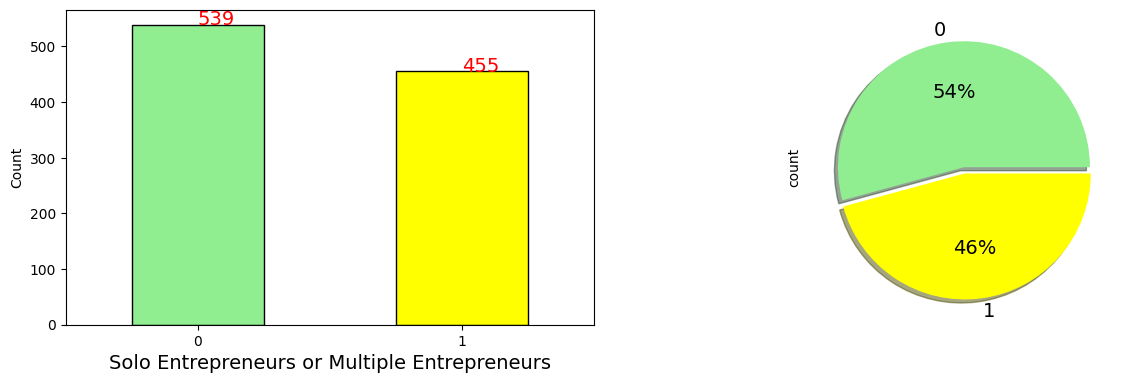

In [120]:
# Solo or multiple Entrepreneurs ?
print(shark_tank['Multiple Entrepreneurs'].value_counts(), "\n")
print(round(shark_tank['Multiple Entrepreneurs'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Multiple Entrepreneurs"].value_counts().plot(kind='bar', color=["lightgreen","yellow"], ec="k")
plt.xlabel("Solo Entrepreneurs or Multiple Entrepreneurs", size=14)
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Multiple Entrepreneurs"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="red")

ax2 = plt.subplot(222)
shark_tank["Multiple Entrepreneurs"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["lightgreen","yellow"], shadow=True, fontsize=14)

In [121]:
shark_tank.corr(numeric_only=True).style.background_gradient(cmap = 'Blues')


,Season Number,Episode Number,Pitch Number,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Advisory Shares Equity,Loan,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Guest Present,Total Deal Amount in Millions
Season Number,1.000000,0.007438,0.996006,0.175905,-0.707991,0.043143,-0.411786,0.191986,0.170601,0.045125,-0.385514,0.139562,-0.033774,0.048499,-0.325557,nan,-0.052299,0.305919,-0.400112,0.010600,-0.311307,0.037038,-0.224093,0.027652,-0.124540,0.070736,-0.222241,0.053187,-0.201900,0.084456,-0.414289,-0.036023,0.452167,0.578792,-0.217565,-0.131094,-0.085755,nan,0.045125
Episode Number,0.007438,1.000000,0.064241,0.034575,0.134997,0.074069,-0.033650,0.049882,-0.002277,0.055010,-0.057700,0.032327,-0.105086,0.092708,-0.005107,-0.785714,0.168563,0.097488,-0.101832,0.018175,0.060985,-0.002313,0.023290,0.269333,0.062408,0.035059,0.105259,0.060120,-0.033545,0.049037,-0.121091,-0.083986,0.219155,0.161899,0.014194,-0.107396,-0.038808,nan,0.055010
Pitch Number,0.996006,0.064241,1.000000,0.175830,-0.729617,0.047509,-0.410671,0.196693,0.169665,0.048675,-0.380807,0.142540,-0.040382,0.054222,-0.320344,-0.740613,-0.028557,0.312438,-0.389429,0.015262,-0.310034,0.043500,-0.222923,0.042033,-0.110768,0.077491,-0.210370,0.054373,-0.199300,0.090264,-0.403223,-0.024286,0.406912,0.566845,-0.222846,-0.135078,-0.097256,nan,0.048675
Multiple Entrepreneurs,0.175905,0.034575,0.175830,1.000000,-0.119220,0.029258,-0.125250,0.030575,0.132255,0.054080,-0.152701,0.065915,0.002720,0.062655,-0.146516,-1.000000,0.062139,0.035012,-0.197283,0.072138,-0.103426,-0.008834,-0.111428,0.046724,-0.076487,0.016905,-0.155522,0.060369,-0.060114,0.062125,-0.139107,0.020429,0.102215,0.115774,0.000435,-0.051831,-0.019014,nan,0.054080
US Viewership,-0.707991,0.134997,-0.729617,-0.119220,1.000000,-0.018689,0.242423,-0.140667,-0.121742,-0.006216,0.180771,-0.102584,0.023841,-0.012557,0.164558,0.911646,-0.048796,-0.246216,0.092241,-0.002204,0.195149,-0.072255,0.155885,0.096293,-0.002085,-0.094506,0.054553,0.027484,0.102008,-0.141501,0.078397,-0.152515,0.112775,-0.103784,0.228894,-0.043645,0.153153,nan,-0.006216
Original Ask Amount,0.043143,0.074069,0.047509,0.029258,-0.018689,1.000000,-0.135492,0.633082,-0.079135,0.881846,-0.187078,0.630630,0.007032,0.871114,-0.169281,-0.904194,0.831246,0.695322,-0.300642,0.811856,-0.214433,0.783363,-0.303787,0.972594,0.153776,0.345471,-0.220460,0.908057,-0.240769,0.808771,-0.208918,-0.014752,0.057716,0.017557,-0.076809,0.001154,-0.025991,nan,0.881846
Original Offered Equity,-0.411786,-0.033650,-0.410671,-0.125250,0.242423,-0.135492,1.000000,-0.409602,-0.112718,-0.154751,0.620324,-0.362026,-0.010527,-0.136448,0.568669,1.000000,-0.396960,-0.163218,0.385510,-0.227730,0.618060,-0.323933,0.583491,0.255316,0.426721,-0.202045,0.381233,-0.219413,0.478778,-0.293475,0.634579,0.062051,-0.243545,-0.294970,0.147711,0.103157,0.078175,nan,-0.154751
Valuation Requested,0.191986,0.049882,0.196693,0.030575,-0.140667,0.633082,-0.409602,1.000000,-0.034299,0.610029,-0.394133,0.893717,-0.009368,0.576014,-0.355614,-0.998374,0.730687,0.528926,-0.431139,0.678819,-0.337376,0.642493,-0.366792,0.628801,-0.122803,0.353827,-0.283787,0.626316,-0.358074,0.685380,-0.322376,-0.026216,0.113173,0.136137,-0.118518,-0.068298,-0.077285,nan,0.610029
Got Deal,0.170601,-0.002277,0.169665,0.132255,-